In [ ]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#import data
data=pd.read_csv('/content/Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


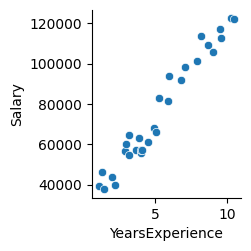

In [ ]:
sns.pairplot(y_vars='Salary', x_vars='YearsExperience', data=data)

In [ ]:
#checking the correaltion of data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
#DATA PREPARATION
x=data['YearsExperience']
y=data['Salary']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
x_train.shape

(21,)

In [ ]:
x_test.shape

(9,)

In [ ]:
#MODEL BUILDING
x_train_sm=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train_sm)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        08:28:34   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387      8.765      0.000    1.92e+04    3.12e+04
YearsExperience  9731.2038    517.993     18.786      0.000    8647.033    1.08e+04
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        08:28:34   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

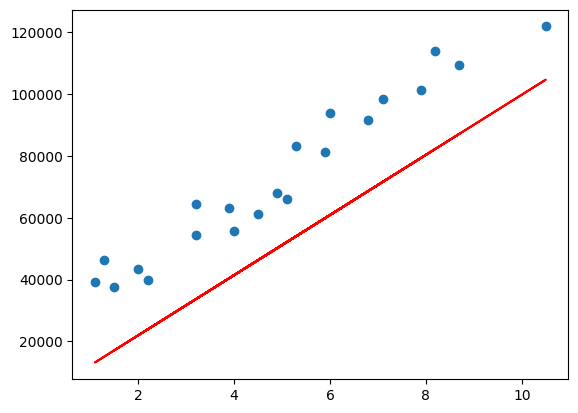

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 2500 + x_train * 9731.2038, 'r')
plt.show()

In [ ]:
#Residual analysis
y_train_pred=model.predict(x_train_sm)

In [ ]:
y_train_pred.head()

,0
17,76778.268129
22,102079.398108
11,64127.703139
4,46611.536230
29,127380.528088


In [ ]:
residual=(y_train-y_train_pred)

In [ ]:
residual.head()

,0
17,6309.731871
22,-777.398108
11,-8333.703139
4,-6720.536230
29,-5508.528088


<Axes: ylabel='Density'>

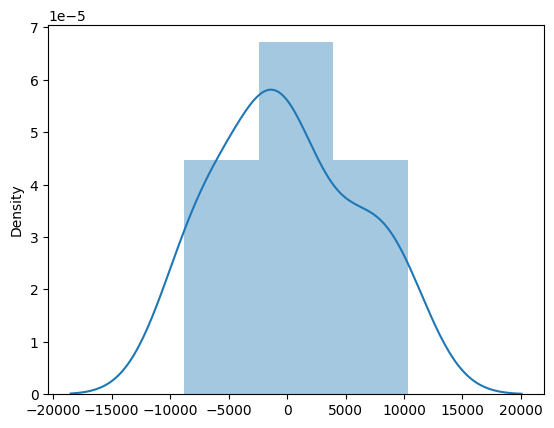

In [ ]:
sns.distplot(residual)

<Axes: xlabel='YearsExperience', ylabel='None'>

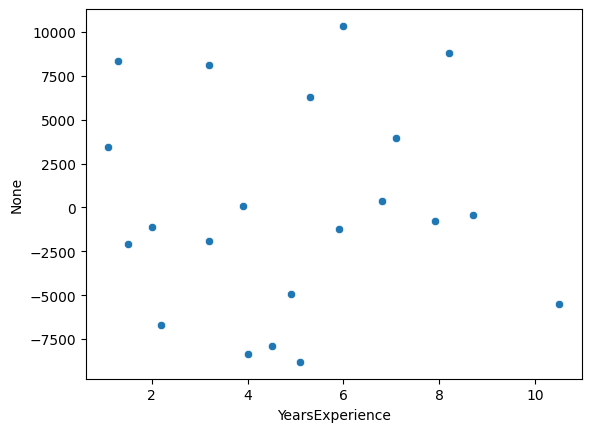

In [ ]:
sns.scatterplot(x=x_train,y=residual)

In [28]:
#PREDICTIONS ON TEST DATA
x_test_sm=sm.add_constant(x_test)

In [29]:
y_pred=model.predict(x_test_sm)

In [30]:
#ROOT MEAN SQUARED ERROR
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

np.float64(5505.479002176121)

In [31]:
#R2 SCORE:
r2_score(y_test,y_pred)

0.9627668685473271

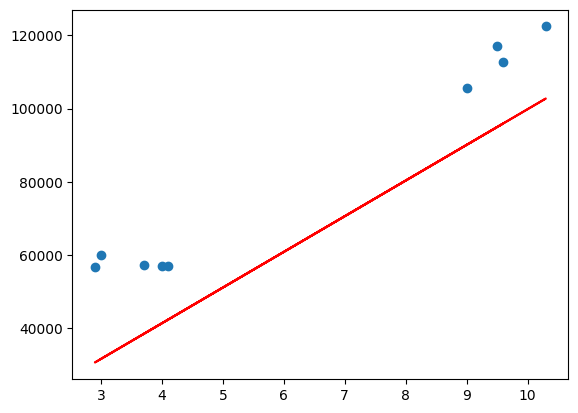

In [32]:
#LET US SHOW THE LINE FITTING:
plt.scatter(x_test,y_test)
plt.plot(x_test, 2500 + x_test * 9731.2038, 'r')
plt.show()